In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *
from general_graph_utils import *

In [28]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

1. Are autocorrelation functions $\mathcal{A}^{\alpha,\beta}(\tau)$ always monotonic decreasing? 
2. Does one of the curves $\mathcal{A}^{\alpha,\beta}(\tau)$ or $\mathcal{A}^{\beta,\alpha}(\tau)$ always lie above the other, or do the two curves cross for positive values of $\tau$? 
3. Does this separation of the two curves always occur regardless of parameter values? 

In [2]:
params = random_parameters()
print(params)

[7.50385587e+02 1.15803978e+00 2.61967539e+02 2.46065641e-03
 1.46376776e-03 5.17724814e+00]


In [3]:
L = Laplacian_K(params)
L

array([[-7.50387050e+02,  1.15803978e+00,  5.17724814e+00],
       [ 7.50385587e+02, -2.63125578e+02,  2.46065641e-03],
       [ 1.46376776e-03,  2.61967539e+02, -5.17970880e+00]],
      dtype=float128)

In [4]:
pi = steady_state_MTT(params)
pi

array([0.00674972, 0.01925806, 0.97399222], dtype=float128)

In [6]:
# double check SS function works
pi_2 = steady_state_spectrum(L)
pi_2

array([[0.00674972],
       [0.01925806],
       [0.97399222]])

In [7]:
signal = [3, 5, 7]
alpha = 1
beta = 3

In [8]:
tau = np.around(np.arange(0.01,4.0,step=.01), decimals = 2)

In [9]:
a_13, a_31 = autocorrelation_analytical(signal,L,tau,pi,alpha,beta)

In [16]:
a_13 >= a_31

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,

In [13]:
a_31 >= a_13

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

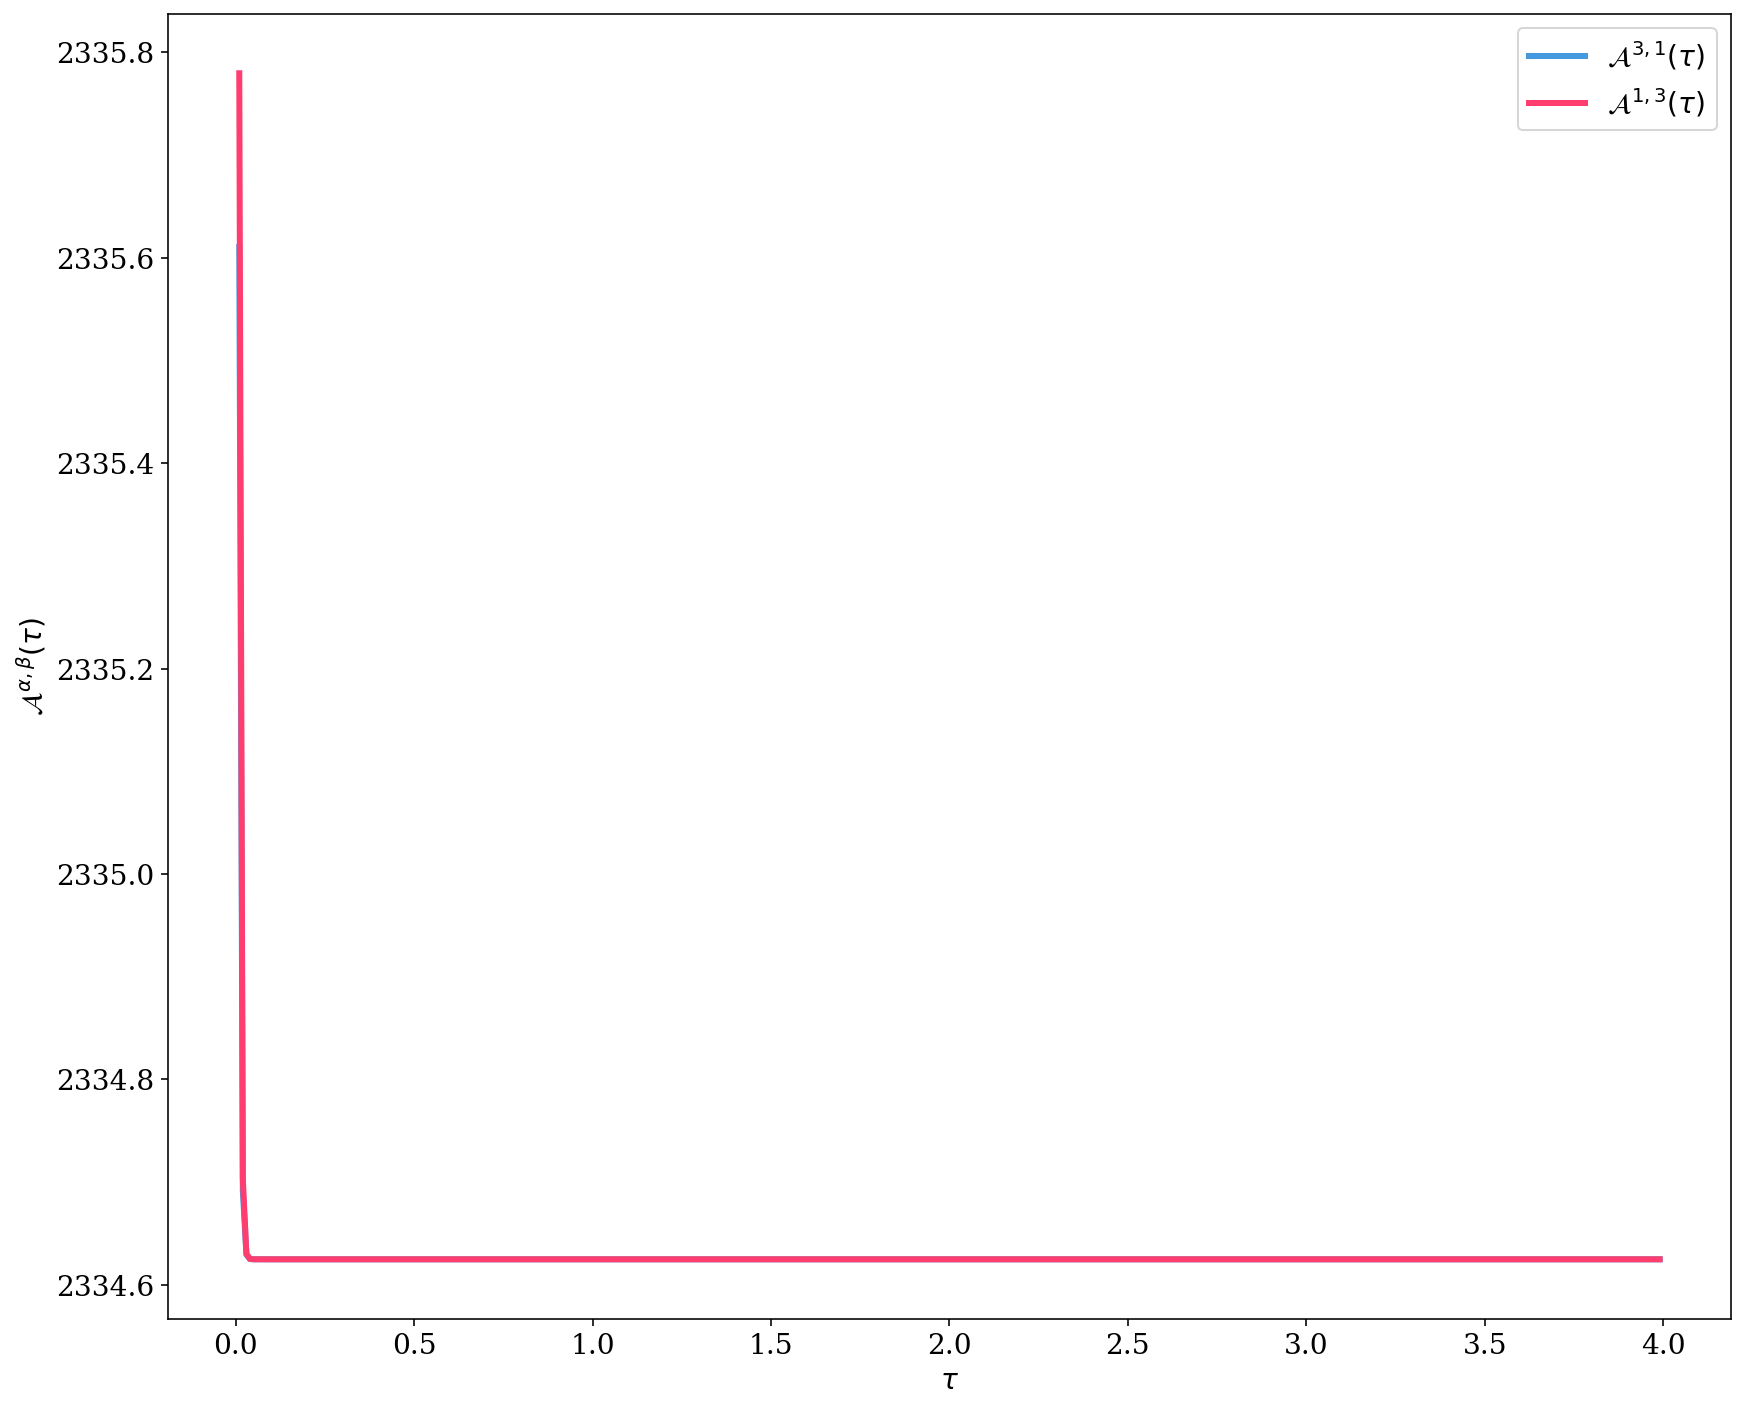

In [29]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= '#4599DF')
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color='#FF3D6E')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()